In [0]:
import sys
folder = '/content/gdrive/My Drive/Colab Notebooks/my_project1/deep-learning/utils'
#sys.path.append(folder)
sys.path.insert(0, folder)


In [2]:
from google.colab import drive
ROOT = "/content/gdrive"
drive.mount(ROOT, force_remount=True)

Mounted at /content/gdrive


In [0]:
from helper import HelperModel
from dataset_info import DataSet
from dataloader import DataLoader
from model import Net
from transforms import Transform
from train import Train
from test import Test
from plot import Plot

### Create model and display summary

In [4]:
model_obj = Net()
# create object for Model
device = HelperModel.get_device()

model = model_obj.to(device)

#create object for helper with object
helper_obj = HelperModel(model_obj)

#display summaru of model
helper_obj.display_model_summay(model, (1, 28, 28))



----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 12, 26, 26]             108
       BatchNorm2d-2           [-1, 12, 26, 26]              24
              ReLU-3           [-1, 12, 26, 26]               0
            Conv2d-4           [-1, 12, 24, 24]           1,296
       BatchNorm2d-5           [-1, 12, 24, 24]              24
              ReLU-6           [-1, 12, 24, 24]               0
            Conv2d-7           [-1, 12, 22, 22]           1,296
       BatchNorm2d-8           [-1, 12, 22, 22]              24
              ReLU-9           [-1, 12, 22, 22]               0
           Conv2d-10           [-1, 12, 22, 22]             144
      BatchNorm2d-11           [-1, 12, 22, 22]              24
             ReLU-12           [-1, 12, 22, 22]               0
        MaxPool2d-13           [-1, 12, 11, 11]               0
           Conv2d-14             [-1, 1

/content/gdrive/My Drive/Colab Notebooks/my_project1/deep-learning/utils/model.py:130: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


### Get the mean, std 

In [5]:
data_set_type = "mnist"
#get data set info
data_set_obj = DataSet("mnist", "./data")
mean = data_set_obj.mean
std = data_set_obj.std


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:55: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


[Train]
 - Numpy Shape: (60000, 28, 28)
 - Tensor Shape: torch.Size([60000, 28, 28])
 - min: tensor(0.)
 - max: tensor(1.)
 - mean: tensor(0.1305)
 - std: tensor(0.3081)
 - var: tensor(0.0949)


### Get the train test transforms 

In [0]:
# Create Image Transform
transform_obj = Transform(mean, std)
train_transforms = transform_obj.train_transforms
test_transforms = transform_obj.test_transforms

### Get Train and Test data set

In [0]:
train_set = data_set_obj.get_train_mnist_dataset(train_transforms)
test_set = data_set_obj.get_test_mnist_dataset(test_transforms)

### Load the train and test data

In [8]:
data_loader_obj = DataLoader(train_set, test_set, batch_size=64)
train_loader = data_loader_obj.train_loader
test_loader = data_loader_obj.test_loader

CUDA Available? True


### Show some training images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


  9   3   0   1


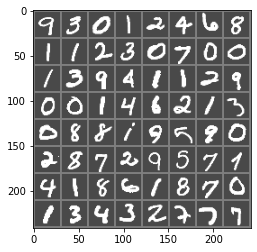

In [9]:
import torchvision
classes = ('0', '1', '2', '3', '4',
           '5', '6', '7', '8', '9')
#get some random training images
iter_train_loader = iter(train_loader)
images, labels = iter_train_loader.next()
# show images
Plot.image_show(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%3s' % classes[labels[j]] for j in range(4)))

### Run the model

In [10]:
optimizer = helper_obj.get_l2_regularizer()
EPOCHS = 2
l1_factor=0.0001

train_obj = Train()
test_obj = Test()
train_max_acc = []
train_min_loss = []
for epoch in range(1, EPOCHS+1):
    print("EPOCH:", epoch)
    train_obj.train(model, device, train_loader, optimizer, l1_factor=l1_factor)
    test_obj.test(model, device, test_loader, misclassfied_required=True)
    train_max_acc.append(train_obj.train_acc[-1])
    train_min_loss.append(train_obj.train_losses[-1])
miscassified_images = test_obj.misclassified_images
test_losses = test_obj.test_losses
test_acc = test_obj.test_acc
print("Maximum Training Accuracy = ", max(train_max_acc))
print("Maximum Testing Accuracy = ", max(test_acc))




  0%|          | 0/938 [00:00<?, ?it/s]

EPOCH: 1


/content/gdrive/My Drive/Colab Notebooks/my_project1/deep-learning/utils/model.py:130: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Train Set: Train Loss=0.07654143869876862 Batch_id=937 Accuracy=88.90: 100%|██████████| 938/938 [00:33<00:00, 27.74it/s]
  0%|          | 0/938 [00:00<?, ?it/s]


Test set: Average loss: 0.0955, Accuracy: 9764/10000 (97.64%)

EPOCH: 2


Train Set: Train Loss=0.20793358981609344 Batch_id=937 Accuracy=97.91: 100%|██████████| 938/938 [00:33<00:00, 27.88it/s]



Test set: Average loss: 0.0624, Accuracy: 9835/10000 (98.35%)

Maximum Training Accuracy =  97.91
Maximum Testing Accuracy =  98.35


### Display graphs

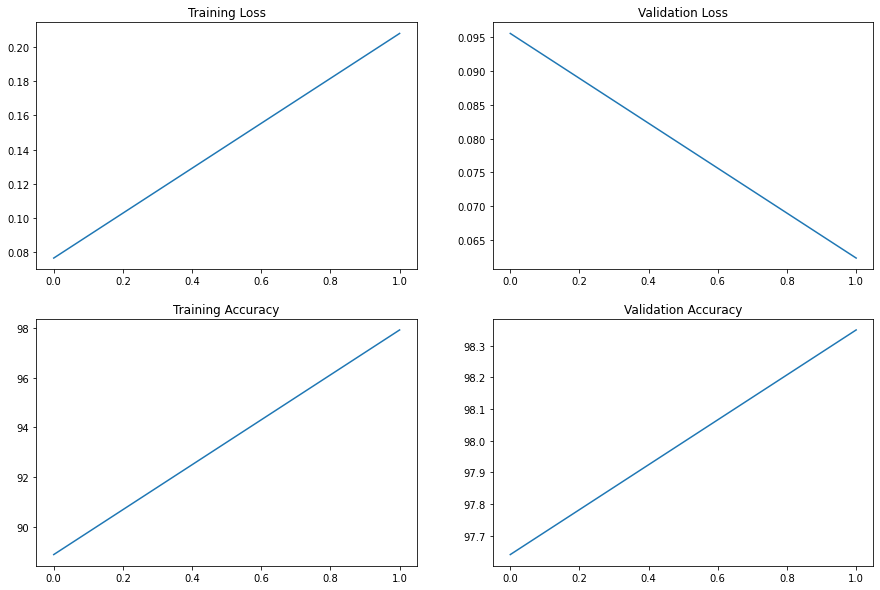

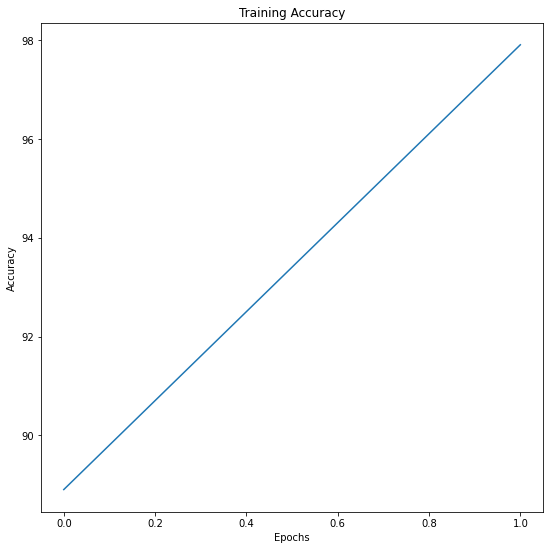

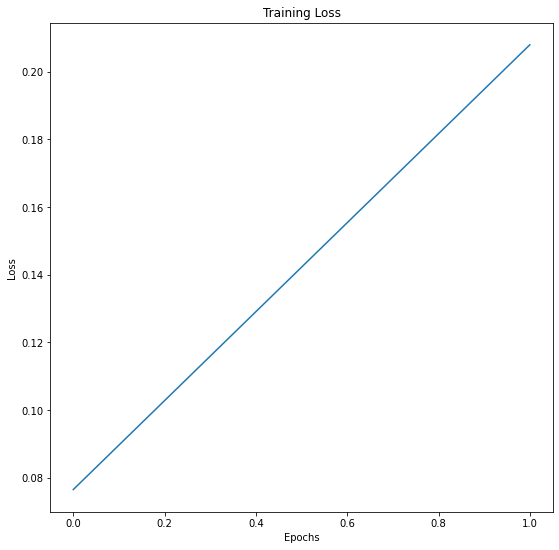

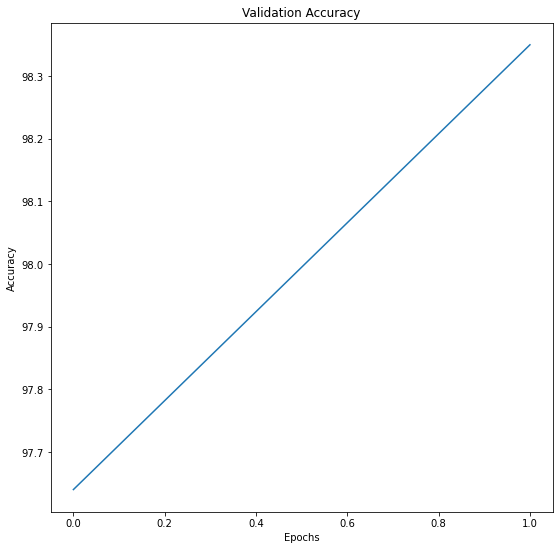

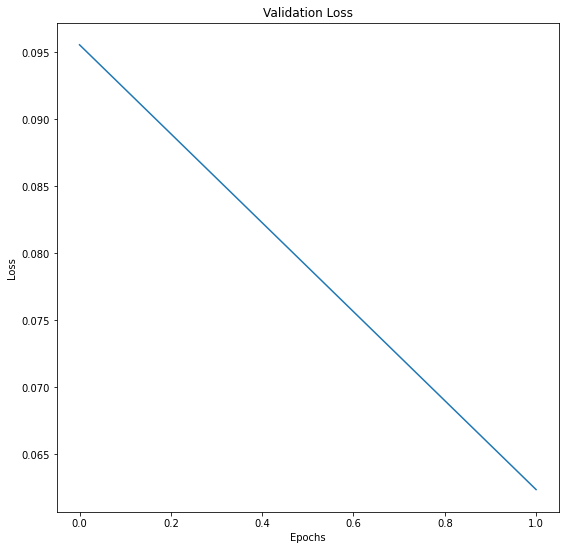

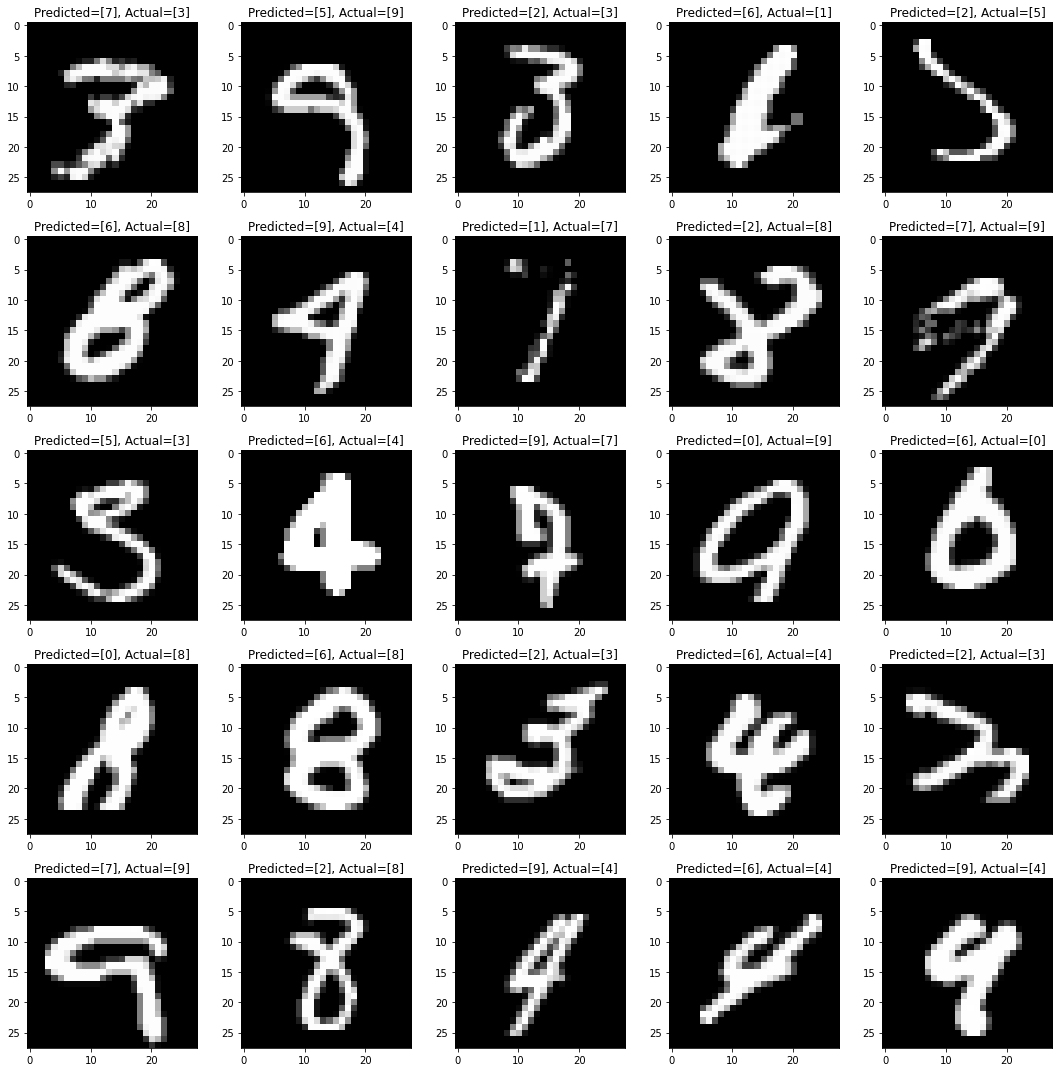

In [13]:
plt_obj = Plot(train_max_acc, train_min_loss, test_acc, test_losses)
# Plot all graph
plt_obj.display_all_plot()
#plot train accuracy graph
plt_obj.plot_train_graph()
#plot train loss graph
plt_obj.plot_train_graph(plot_case="Loss")
#plot validation accuracy graph
plt_obj.plot_validation_graph()
#plot validation loss graph
plt_obj.plot_validation_graph(plot_case="Loss")
#plot 25 misclassified images
Plot.plot_misclassified(miscassified_images)